# CLASE 2.2: Una introducción al API de <font color='mediumorchid'>Scikit-Learn</font>.
---

## Introducción.
En lo que resta de estos apuntes (o, al menos, en su gran mayoría), nos dedicaremos a implementar distintos algoritmos de machine learning en Python haciendo uso de la librería **<font color='mediumorchid'>Scikit-Learn</font>**, y que corresponde a uno de los recursos más utilizados en el mundo para la construcción de soluciones a infinidad de problemas por medio de modelos basados en este tipo de algoritmos.

**<font color='mediumorchid'>Scikit-Learn</font>** es una librería de Python construida sobre tres librerías esenciales que ya hemos estudiado previamente en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main): **<font color='mediumorchid'>Numpy</font>**, **<font color='mediumorchid'>Scipy</font>** y **<font color='mediumorchid'>Matplotlib</font>**. El objetivo de **<font color='mediumorchid'>Scikit-Learn</font>** es proveer a los desarrolladores de herramientas sencillas y eficientes para el análisis de datos a nivel predictivo (*classic machine learning*), y cualquier aspirante a profesional de la ciencia de datos debería disponer de esta librería en su *caja de herramientas*. Es por eso que haremos lo posible por describir sus funcionalidades en el campo del aprendizaje supervisado, no supervisado, pre-procesamiento de datos y la selección de modelos.

La librería **<font color='mediumorchid'>Scikit-Learn</font>** se caracteriza por su API limpia, uniforme y con una enorme calidad en su código y mantenimiento, contando además con una [documentación](https://scikit-learn.org/stable/index.html) que cubre de sobremanera cualquier duda que tengamos en relación a la implementación de cualquiera de sus módulos, funciones o clases. Esta API ha sido desarrollada con una filosofía de flexibilidad y escalabilidad en todo nivel, de manera tal que, una vez aprendida la sintaxis de ajuste y predicción de un tipo de modelo, el cambio a otro es relativamente directo, con exactamente los mismos atributos, variando solamente los argumentos propios (`**kwargs`) de cada uno.

**<font color='mediumorchid'>Scikit-Learn</font>** puede instalarse en nuestro computador con Windows fácilmente usando el índice de paquetes de Python mediante la siguiente instrucción en una terminal (Powershell, CMD, o cualquiera de nuestra preferencia):

    pip install -U scikit-learn

Partiremos pues importando las librerías que utilizaremos en esta sección. Notemos que no haremos aún una importación de **<font color='mediumorchid'>Scikit-Learn</font>**, puesto que para su uso será más común que consideremos sus diversos **módulos** por separado. Esto es algo que veremos en detalle más adelante:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Un setting previo para hermosear nuestras figuras.
plt.rcParams["figure.dpi"] = 100
sns.set()
plt.style.use("bmh")

In [3]:
%matplotlib notebook

## Representación de la data en <font color='mediumorchid'>Scikit-Learn</font>.
Partiremos cubriendo la representación de la data en **<font color='mediumorchid'>Scikit-Learn</font>**, seguido de la API estimadora de esta librería. Para ejemplificar los conceptos que aprenderemos y su correspondiente implementación, haremos uso de algunos *toysets* masivamente utilizados en muchísimos cursos en línea, ya que serán más que suficientes para la ejemplificación de los mismos.

### Data con formato de tabla.
Una tabla básica corresponde a una grilla bidimensional conformada por datos en cada uno de sus registros. Las filas representan los elementos individuales de un conjunto de datos, y las columnas representan las cualidades o atributos que caracterizan al conjunto de datos. Por ejemplo, consideremos el *toyset* **<font color='forestgreen'>IRIS</font>**, que ya habíamos descrito previamente, y que consta de un total de 150 muestras de características relativas a flores de la especie Iris, con un subconjunto de muestras perteneciente a cada subespecie Iris Setosa, Iris Versicolor o Iris Virginica. Este conjunto de datos puede encontrarse en una gran cantidad de librerías de Python dedicadas al análisis de datos, y por supuesto **<font color='mediumorchid'>Scikit-Learn</font>** no es la excepción. Esta librería, de hecho, cuenta con un módulo dedicado a la descarga de diversos *toysets* denominado `sklearn.datasets` (en Python, la librería **<font color='mediumorchid'>Scikit-Learn</font>** suele tener como *namespace* a `sklearn`, y no `scikit-learn`, como cabría esperar), el que cuenta varias funciones para cada *toyset* de interés. En el caso del conjunto de datos **<font color='forestgreen'>IRIS</font>**, éste puede cargarse rápidamente haciendo uso de la función `load_iris()` como sigue:

In [4]:
from sklearn.datasets import load_iris

In [5]:
# Carga del dataset IRIS.
iris_dataset = load_iris(as_frame=True)

En el código anterior, hemos hecho uso del argumento booleano `as_frame` para retornar las *componentes* del dataset en un formato de DataFrame de **<font color='mediumorchid'>Pandas</font>**. Los objetos retornados por las funciones de carga de datasets en **<font color='mediumorchid'>Scikit-Learn</font>** suelen ser diccionarios que cuentan con las siguientes llaves:

- `data`: Los atributos que componen el dataset. Recordemos que, con *atributos*, nos referimos a las variables independientes del mismo. Como hemos seteado el parámetro `as_frame=True`, tales atributos y sus valores vendrán en un formato de DataFrame de **<font color='mediumorchid'>Pandas</font>**. En caso contrario, el formato será de un arreglo bidimensional de **<font color='mediumorchid'>Numpy</font>**.
- `target`: Un arreglo unidimensional que contiene las *etiquetas* o valores objetivo de un dataset y que deseamos predecir por medio de un determinado modelo. Como hemos seteado el parámetro `as_frame=True`, tales atributos y sus valores vendrán en un formato de serie de **<font color='mediumorchid'>Pandas</font>**. En caso contrario, el formato será de un arreglo unidimensional de **<font color='mediumorchid'>Numpy</font>**.
- `DESCR`: Una descripción del dataset que hemos cargado.

La descripción siempre es útil, porque nos aclarará cualquier duda que tengamos, posiblemente, en relación al correspondiente conjunto de datos:

In [6]:
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

En el dataset que hemos cargado previamente, cada fila del mismo está referida a la observación de una única flor, y el número de filas corresponde al número total de flores que pueblan el dataset. En general, nos ceñiremos a las nomenclaturas *clásicas* que establecimos en la [clase 2.1](https://github.com/rquezadac/udd_data_science_lectures/blob/develop/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_1.ipynb), y nos referiremos a las filas de esta **matriz de datos** como **registros**, **instancias** u **observaciones**. Así, el número total de observaciones lo denotaremos como `n_samples`. Igualmente, cada columna del dataset está referida a una determinada pieza de información cualitativa que describe cada observación. En general, nos referiremos a las columnas de la matriz como **variables** o **atributos**; así, el número total de columnas del dataset se denotará como `n_features`.

En la Fig. (2.1) hemos ilustrado el formato de tabla que **<font color='mediumorchid'>Scikit-Learn</font>** suele esperar cuando deseamos ajustar un determinado modelo.

<p style="text-align: center;"><img src="figures/fig_2_1.png" width="450"></p>
<p style="text-align: center;">Fig. (2.1): Un esquema general de como <font color='mediumorchid'>Scikit-Learn</font> espera que se imputen los datos en un modelo determinado</p>

### Matriz de atributos (variables independientes).
El formato de tipo tabla que hemos especificado previamente nos deja claro que la información puede ser idealizada o entendida como una matriz bidimensional de elementos numéricos, que denominamos como **matriz de atributos**. Por convención, la matriz de atributos suele almacenarse en **<font color='mediumorchid'>Scikit-Learn</font>** en una variable de nombre `X`, que puede ser un arreglo bidimensional de **<font color='mediumorchid'>Numpy</font>** o un DataFrame de **<font color='mediumorchid'>Pandas</font>**. Dicha matriz siempre se asume como bidimensional, con morfología igual a `(n_samples, n_features)`.

Las **observaciones** (i.e., filas) siempre están referidas a objetos individuales descritos por el dataset. Por ejemplo. La observación podría ser una flor, una persona, un período de tiempo, una imagen, un registro de audio, un video o cualquier elemento distintivo del problema que queramos abordar, mientras dicho elemento pueda ser descrito por números. Por otro lado, los **atributos** (i.e., columnas) siempre están referidos a las características que describen un dataset de forma cualitativa. Los atributos, en general, están conformados por data de tipo continua, pero a veces pueden presentarse en términos de data Booleana o categórica.

Para el dataset que hemos cargado en **<font color='mediumorchid'>Scikit-Learn</font>**, la matriz de atributos puede especificarse por medio de la llave `"data"`:

In [7]:
# Matriz de atributos del dataset IRIS.
X = iris_dataset["data"]

In [8]:
# Mostramos las primeras filas de esta matriz.
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Arreglo de valores objetivo o etiquetas.
En adición a la matriz de atributos `X`, también trabajamos con un arreglo que contiene la variable de respuesta u objetivo, y que por consiguiente llamamos **arreglo de valores objetivo**, denotándolo usualmente como `y`. Dicho arreglo suele ser unidimensional, conùn tamaño igual a `n_samples`, y generalmente se presenta en forma de un arreglo de **<font color='mediumorchid'>Numpy</font>** o una serie de **<font color='mediumorchid'>Pandas</font>**. El arrelgo objetivo puede contener variables numéricas o categóricas. Mientras que algunos estimadores de **<font color='mediumorchid'>Scikit-Learn</font>** son capaces de manejar múltiples valores objetivos en la forma de un arreglo objetivo bidimensional de morfología `(n_samples, n_targets)`, en general, nos limitaremos al estudio de problemas con una única variable de respuesta.

En el caso del dataset que hemos cargado en **<font color='mediumorchid'>Scikit-Learn</font>**, este arreglo puede especificarse por medio de la llave `"target"`:

In [9]:
# Arreglo de valores objetivo del dataset IRIS.
y = iris_dataset["target"]

In [10]:
# Mostramos las primeras filas de este arreglo.
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

En el arreglo anterior, se ha codificado cada subespecie de flor Iris con un valor numérico que es igual a 0 para flores de la subespecie Iris Setosa, 1 para flores de la subespecie Iris Versicolor, y 2 para flores de la subespecie Iris Virginica.

Con frecuencia, un elemento que induce confusión al iniciarnos en la ciencia de datos y, puntualmente, en el modelamiento predictivo, corresponde a la diferenciación existente entre los atributos y la variable objetivo. En este caso, basta con decir que la variable objetivo es la que, en general, deseamos predecir en un problema de aprendizaje supervisado. Por ejemplo, en el dataset **<font color='forestgreen'>IRIS</font>**, podríamos querer construir un modelo con el objetivo de predecir la especie de flor basados en las otras mediciones que hemos observado en la matriz de atributos `X`.

Para visualizar un dataset, existen muchísimos recursos gráficos que ya hemos abordado en detalle en el repositorio de [Análisis de Datos](https://github.com/rquezadac/udd_data_analytics_lectures/tree/main). En este caso particular, un gráfico de tipo *pairplot* es más que suficiente. Para ello, podemos concatenar la matriz de atributos y el vector de valores objetivo a fin de construir el input que deseamos graficar:

In [11]:
# Concatenamos X e y.
iris = pd.concat([X, y], axis=1)

Y ya podemos construir nuestro gráfico:

<IPython.core.display.Javascript object>


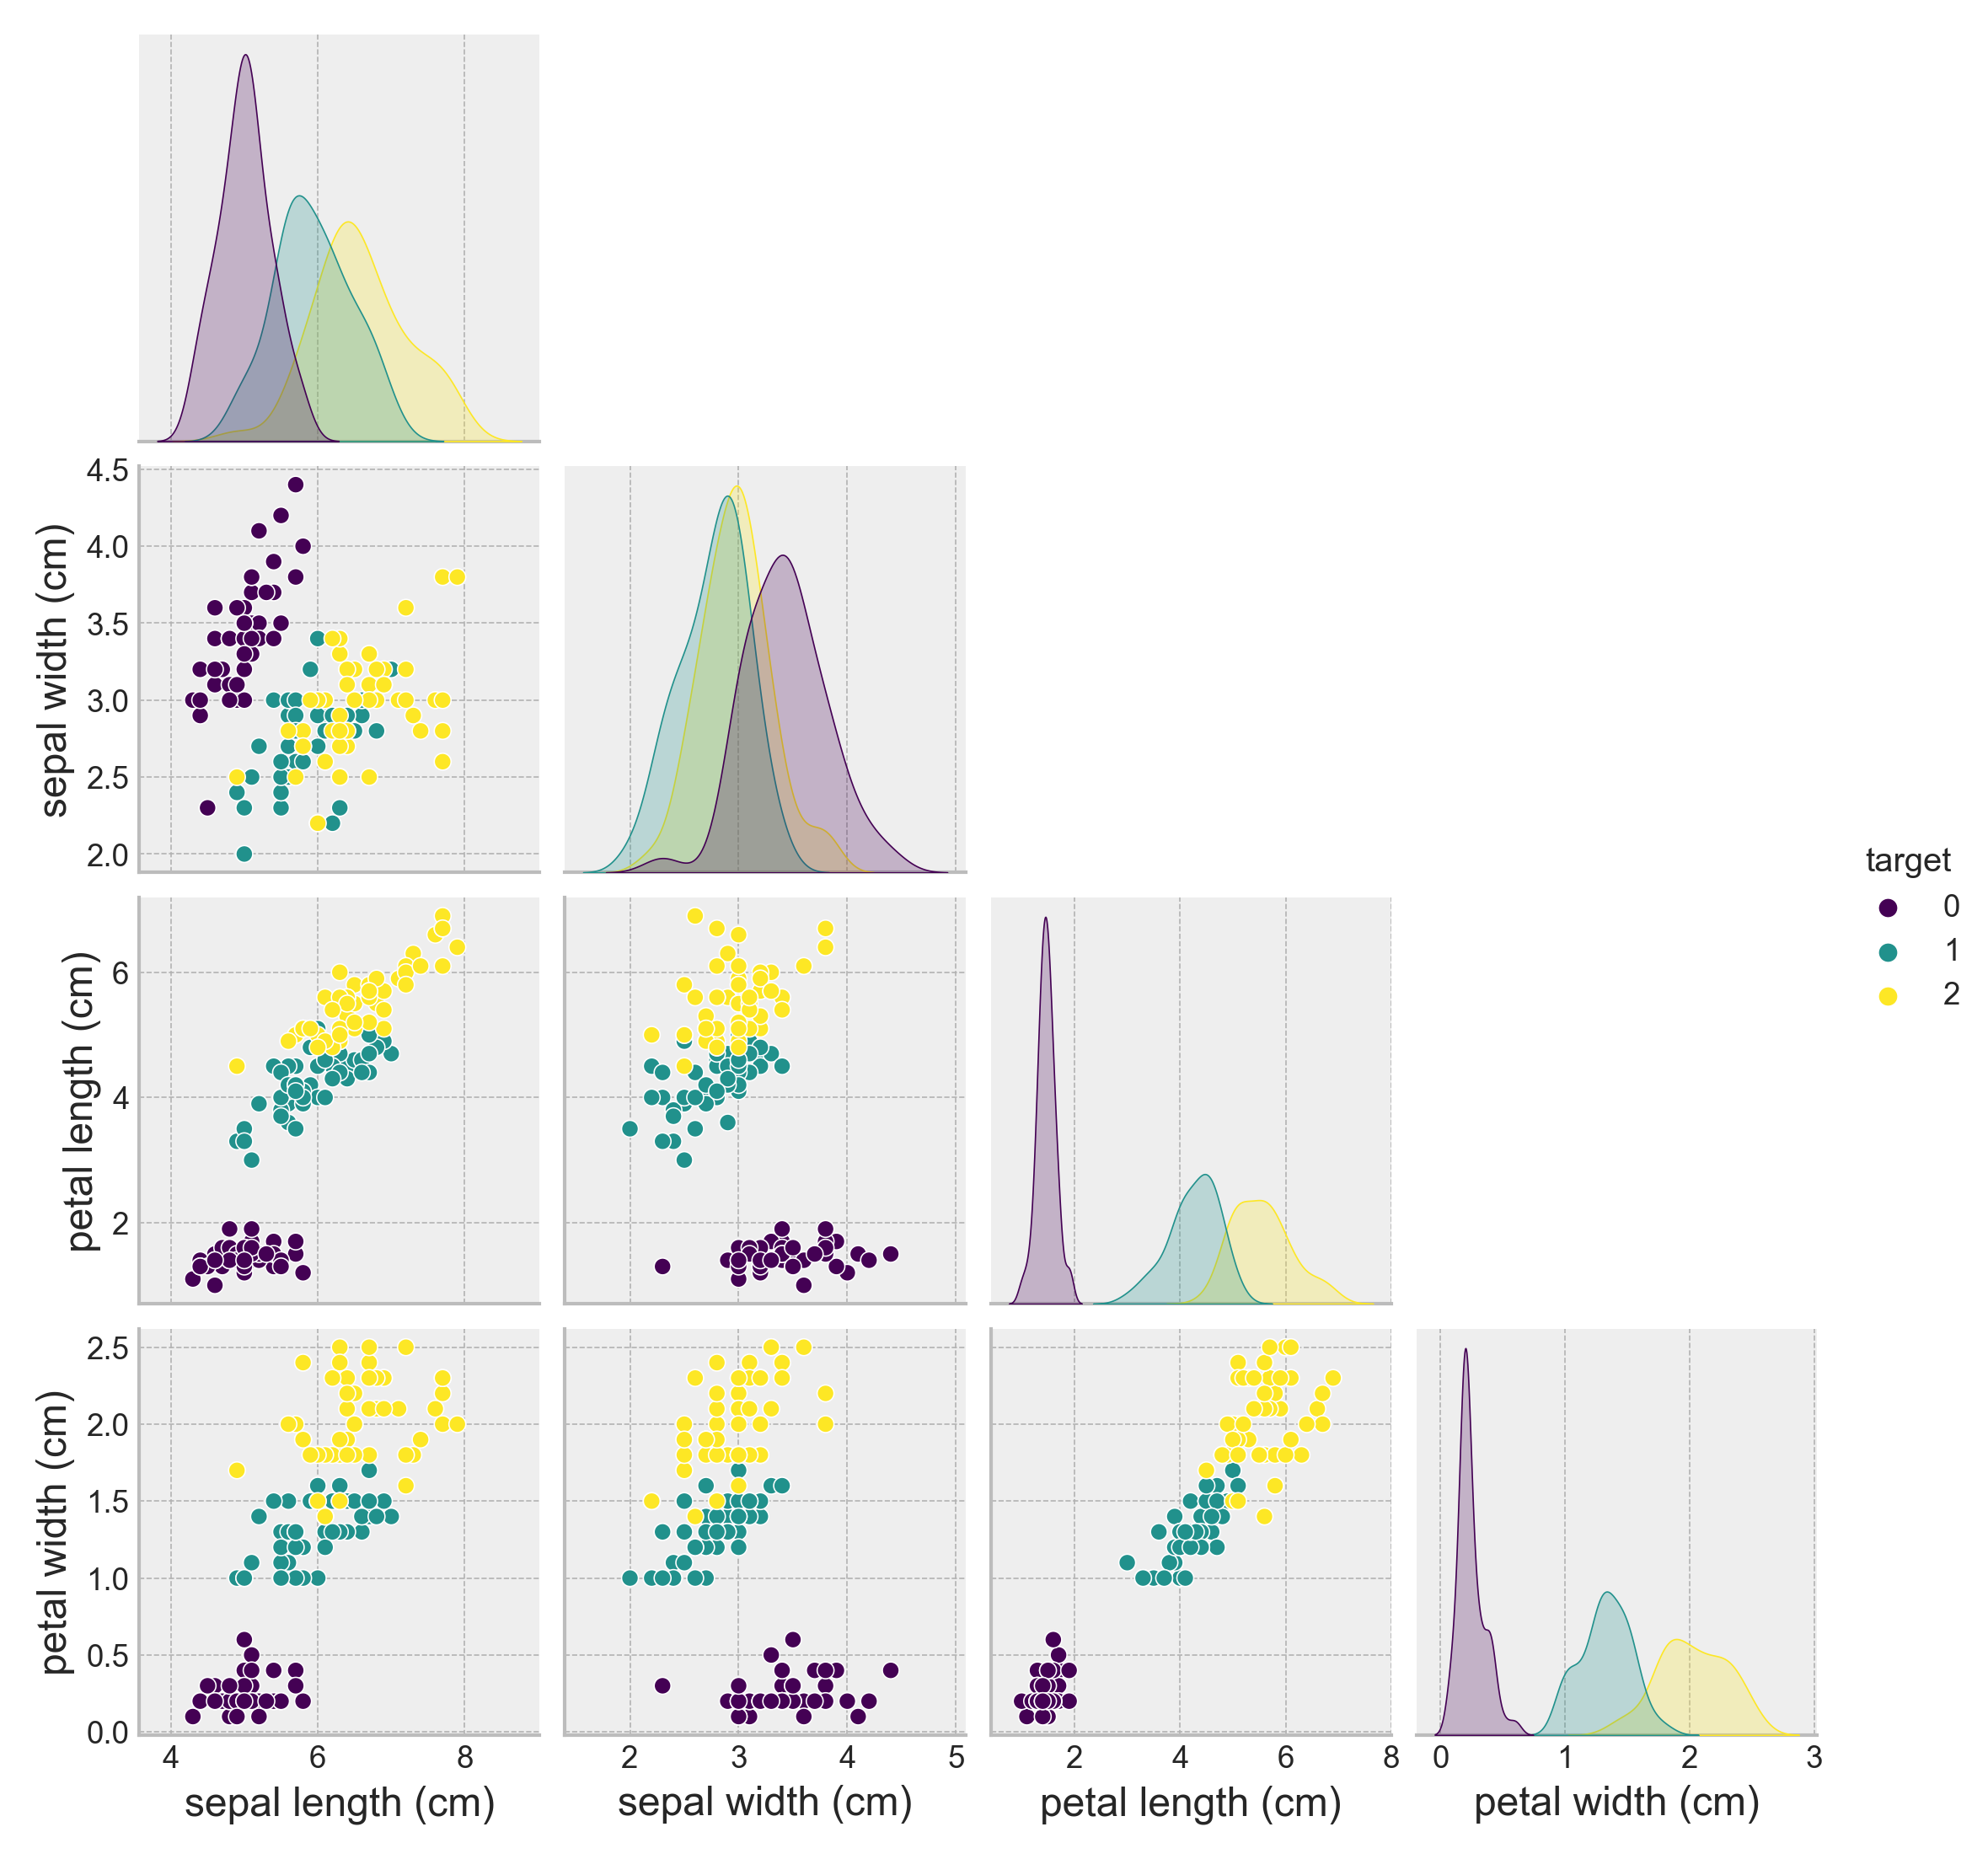

In [12]:
# Pairplot con todas las variables.
sns.pairplot(iris, hue="target", height=2.3, corner=True, palette="viridis");

Con todo esto en mente, ya podemos avanzar hacia lo que es la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**.

## API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**.
La API de **<font color='mediumorchid'>Scikit-Learn</font>** está diseñada con los siguientes principios fundamentales en mente:

- **Consistencia:** Todos los objetos comparten una interfaz común, con un conjunto limitado de métodos, con documentación consistente.
- **Inspección:** Todos los valores de parámetros específicos son expuestos como atributos públicos.
- **Jerarquía limitada de objetos:** Solamente los algoritmos son representados como clases de Python; los datasets son representados es formatos de tipo estándar (arreglos de **<font color='mediumorchid'>Numpy</font>**, DataFrames de **<font color='mediumorchid'>Pandas</font>**, matrices dispersas de **<font color='mediumorchid'>Scipy</font>**), y los nombres de cada parámetro son simplemente strings de Python.
- **Composición:** Muchos problemas de machine learning pueden ser expresados como secuencias de algoritmos más fundamentales, y **<font color='mediumorchid'>Scikit-Learn</font>** hace uso de ello cada vez que sea posible.
- **Valores por defecto sensibles:** Cuando los modelos requieren parámetros especificados por el usuario, la librería siempre define valores apropiados por defecto para cada uno.

En la práctica, estos principios permiten que **<font color='mediumorchid'>Scikit-Learn</font>** sea extremadamente fácil de utilizar, una vez que dichos principios son entendidos apropiadamente. Cada algoritmo de machine learning en **<font color='mediumorchid'>Scikit-Learn</font>** se implementa mediante la API estimadora, lo que nos provee de una interfaz consistente con un amplio rango de aplicaciones.

### Elementos básicos de la API.
En general, los pasos a la hora de utilizar la API estimadora son los siguientes:

- Escoger una clase que represente la implementación de un determinado algoritmo de aprendizaje, importándola desde el módulo adecuado de **<font color='mediumorchid'>Scikit-Learn</font>** (por ejemplo, el módulo `sklearn.preprocessing` se especializa, como cabría esperar, en operaciones de pre-procesamiento de datos, incluyendo limpiezas, escalamientos y autoimputaciones).
- Escoger los **hiperparámetros** del modelo, generando las debidas instancias dentro de la clase con los valores deseados.
- Presentar la data dentro de una matriz de atributos y un vector objetivo, conforme lo comentado previamente.
- Ajustar el modelo a nuestros datos mediante el método `fit()` de la instancia que define el modelo. Cualquier modelo que implique un ajuste (o cualquier transformación que también lo requiera) siempre vendrá equipado, en su correspondiente clase, con este método.
- Aplicar el modelo a datos nuevos:
    - Para un problema de **aprendizaje supervisado**, en general realizamos predicciones vía el atributo `predict()`. Algunos modelos serán capaces de generar salidas en formato de probabilidades, para lo cual será común el uso del método `predict_proba()`.
    - Para un problema de **aprendizaje no supervisado**, con frecuencia, transformamos o inferimos propiedades mediante métodos tales como `transform()` o `predict()`.

**Ejemplo 2.1 – Un problema sencillo de regresión lineal:** Como ejemplo introductorio, consideremos un problema sencillo de regresión lineal. Vale decir, queremos ajustar una recta a un conjunto de datos en $\mathbb{R}^{2}$, comúnmente con ruido, que suele representarse por medio de un par $(x_{i}, y_{i})$, para un total de $m$ instancias (donde $i=1,...,m$). Para ejemplificar como implementar rápidamente un modelo de regresión lineal en **<font color='mediumorchid'>Scikit-Learn</font>**, crearemos algo de data sencilla haciendo uso del generador de números pseudoaleatorios de **<font color='mediumorchid'>Numpy</font>**:

In [13]:
# Definimos una semilla aleatoria fija.
rng = np.random.default_rng(42)

In [14]:
# Definimos un total de 50 puntos del tipo (X, y).
X = 10 * rng.random(size=50)
y = 2 * X - 1 + rng.normal(loc=0, scale=1, size=50)

<IPython.core.display.Javascript object>


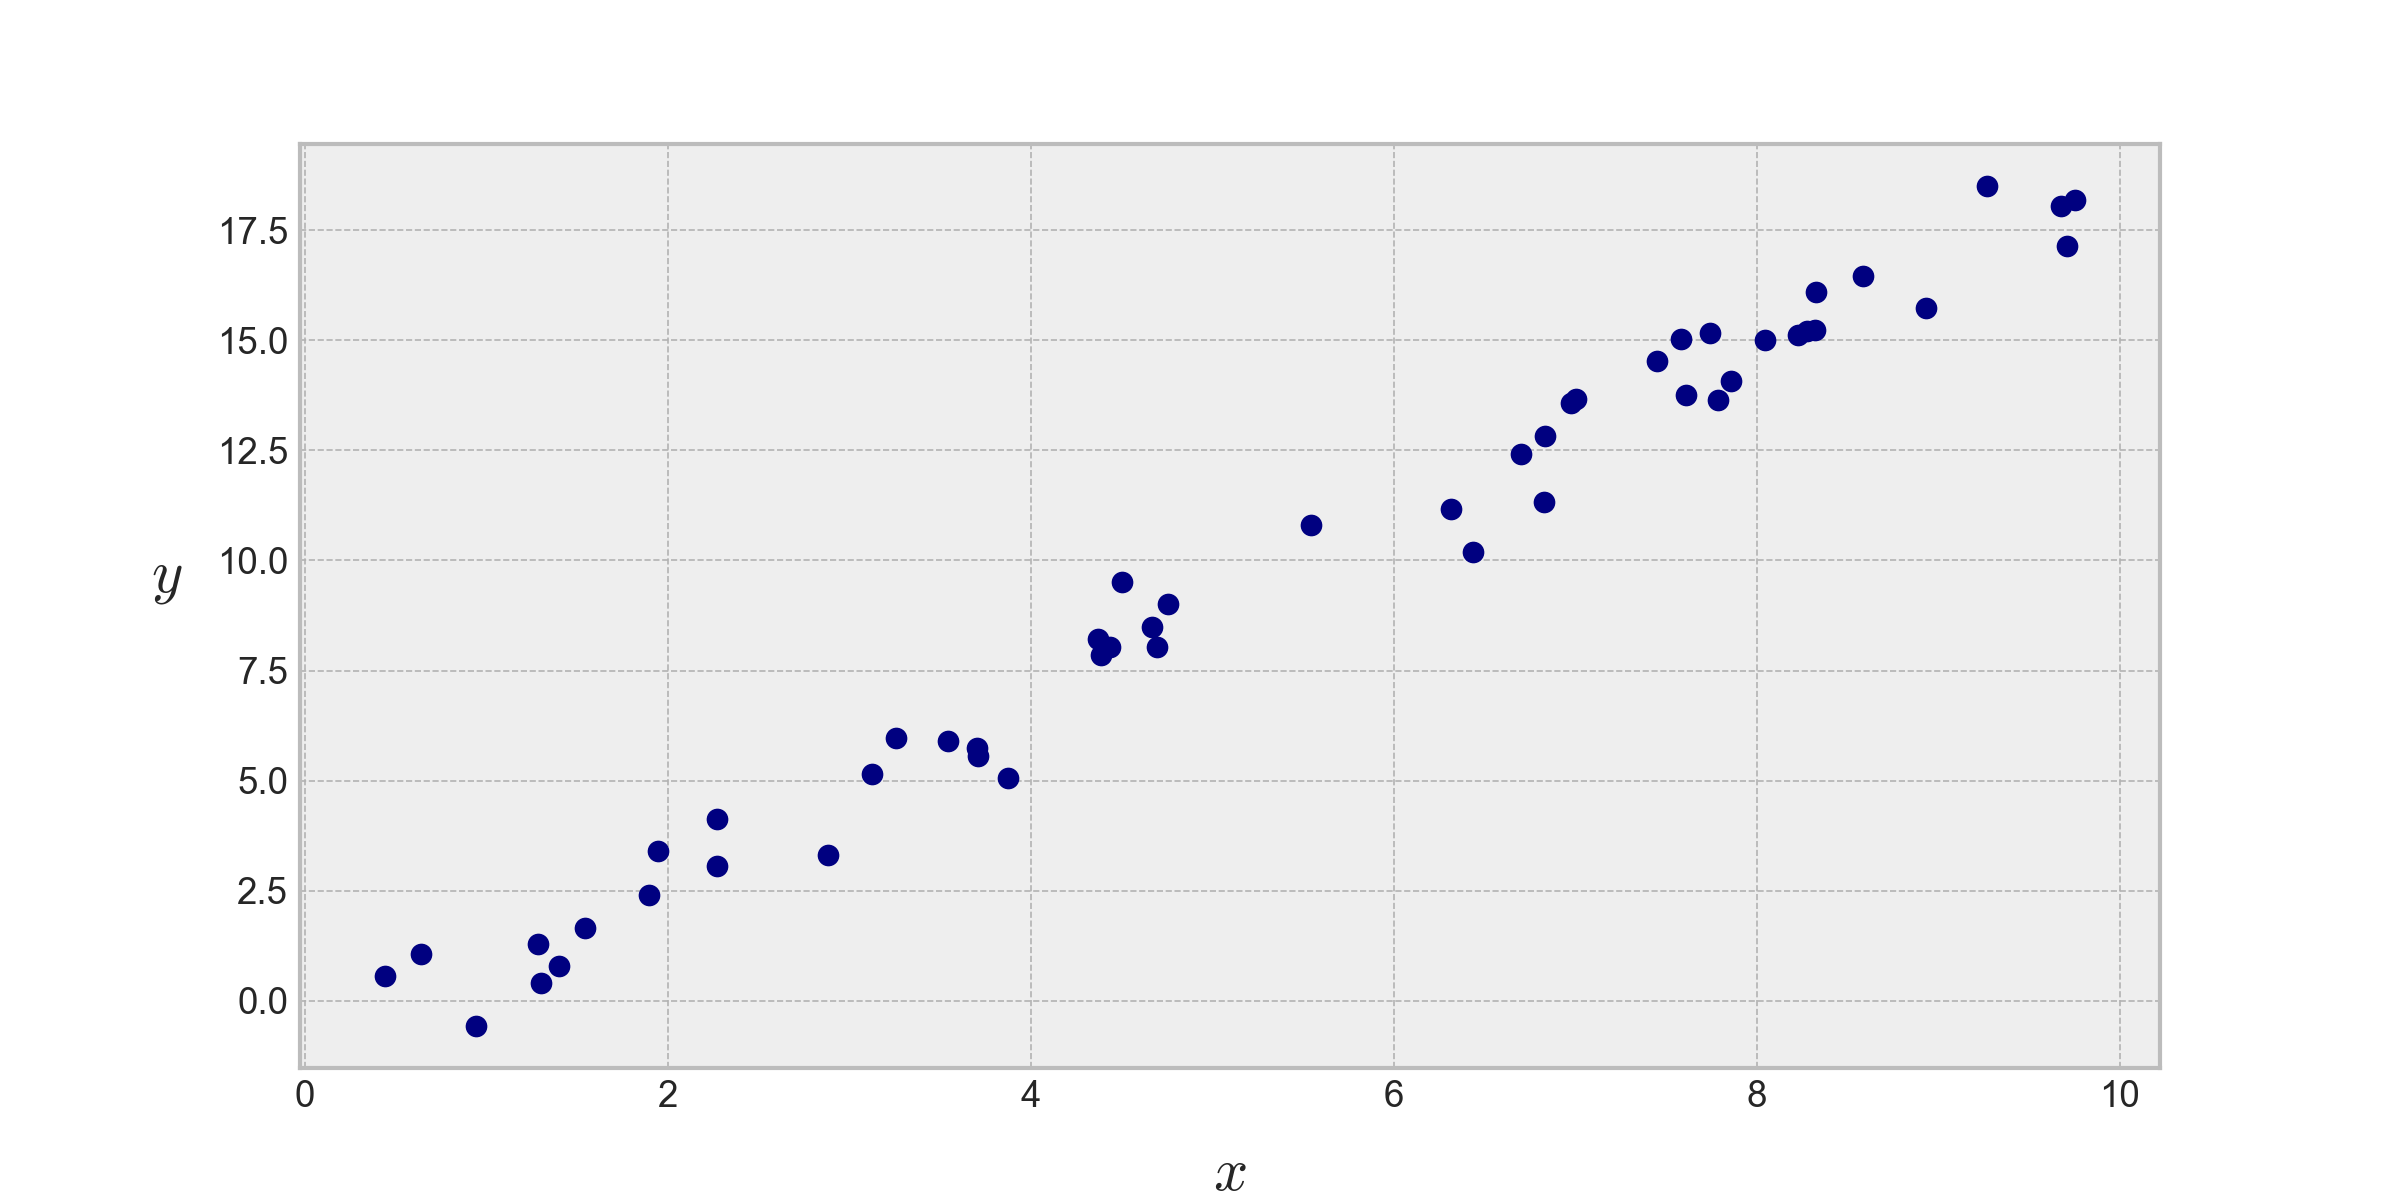

In [15]:
# Graficamos nuestro conjunto de datos.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="navy", marker="o")
ax.set_xlabel(r"$x$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=18, labelpad=15, rotation=0);

Con esta data ya definida, podemos utilizar la receta comentada previamente:

**<font color='darkred'>Paso 1 – Escoger una clase que define el modelo a implementar:</font>** En **<font color='mediumorchid'>Scikit-Learn</font>**, cada algoritmo de aprendizaje está representada por una clase de Python, las cuales se empaquetan en módulos que se corresponden con una determinada clase de algoritmos de aprendizaje. De esta manera, para el caso de modelos de regresión lineal generalizados, siempre buscaremos alternativas de algoritmos en el módulo `sklearn.linear_model`. Así, por ejemplo, si queremos desarrollar un modelo de regresión línea simple, podemos importar la clase `LinearRegression` de dicho módulo como sigue:

In [16]:
from sklearn.linear_model import LinearRegression

**<font color='darkred'>Paso 2 – Escoger los hiperparámetros del modelo:</font>** Cada algoritmo de aprendizaje es todo un mundo de opciones, e intentaremos describir tales opciones en un contexto general. Por ejemplo, la clase `LinearRegression` permite implementar un modelo de regresión lineal múltiple con base en un ajuste de mínimos cuadrados. Este modelo particular cuenta con algunos hiperparámetros:

- `fit_intercept`: Corresponde a un parámetro booleano que permite definir si el modelo a construir contará o no con un parámetro de sesgo. Como ya hemos visto en otras ocasiones, el modelo de regresión lineal puede escribirse, para el caso de $n$ atributos y una instancia $i$-ésima, como $y_{i}=\theta_{0}+\sum_{j=1}^{n}\theta_{j}x_{ij}$, siendo $\theta_{0}$ el mencionado parámetro de sesgo y $\mathbf{\theta}=(\theta_{1},...,\theta_{n})\in \mathbb{R}^{n}$ en vector donde agrupamos los parámetros (coeficientes) del modelo. Si `fit_intercept=False`, forzamos a **<font color='mediumorchid'>Scikit-Learn</font>** a que $\theta_{0}$ sea igual a cero.
- `positive`: Se trata de otro parámetro booleano, que permite forzar a **<font color='mediumorchid'>Scikit-Learn</font>** a que el ajuste sea tal que $\theta_{j}>0; \forall j=1,...,n$.

Los hiperparámetros definen las características propias que tendrá nuestro modelo y que dependen íntegramente de nuestro criterio como expertos en cada caso. Por esta razón, dependiendo de la clase que hayamos escogido, al seleccionar tales hiperparámetros, debemos hacer siempre el ejercicio de responder algunas de las siguientes preguntas:

- ¿Queremos que el ajuste incluya algún parámetro de sesgo (como un coeficiente de intercepción, en el caso del modelo de regresión lineal)?
- ¿Nos gustaría que el modelo esté normalizado (vale decir, que previamente tengamos que escalar nuestra matriz de atributos, de tal forma que cada una de las variables siga una distribución normal estándar)?
- ¿Queremos pre-procesar nuestros atributos para darle más flexibilidad a nuestro modelo (por ejemplo, implementar alguna transformación sobre los datos categóricos, o estandarizar datos numéricos)?
- ¿Qué nivel de regularización queremos implementar en nuestro modelo (a fin de reducir algunos problemas que veremos más adelante)?

Estos son ejemplos de decisiones importantísimas que debemos tomar una vez que hemos seleccionado la clase de modelo que queremos utilizar. Tales elecciones, con frecuencia, están representadas por hiperparámetros. En **<font color='mediumorchid'>Scikit-Learn</font>**, los hiperparámetros se escogen pasando sus respectivos valores cuando instanciamos una clase. No constituyen una decisión fácil, y muchas veces nuestro criterio no bastará para escoger un valor adecuado para cada uno. Pero toda línea base (es decir, un *primer modelo* contra el cual contrastaremos otros más sofisticados) requiere de tener una mínima noción de cuáles hiperparámetros utilizar.

Habiendo establecido lo anterior, vamos a construir pues un modelo de regresión lineal que sí disponga de un parámetro de sesgo. De esta manera, instanciaremos la clase `LinearRegression` a una variable llamada `model`, sobre la cual trabajaremos en forma posterior:

In [17]:
# Instanciamos nuestro modelo.
model = LinearRegression(fit_intercept=True)

In [18]:
# Mostramos esta instancia en pantalla.
model

LinearRegression()

Debemos tener en consideración que, cuando un modelo es instanciado, la única acción que ejecutamos es el almacenamiento de los respectivos hiperparámetros. En particular, aún no hemos realizado ningún ajuste del modelo a nuestros datos: La API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>** deja muy claro esto: No es lo mismo escoger un modelo que aplicarlo.

**<font color='darkred'>Paso 3 – Arreglar nuestra data en una matriz de atributos y un vector objetivo:</font>** Unas líneas atrás detallamos cómo es la representación de la data en **<font color='mediumorchid'>Scikit-Learn</font>**, la cual requiere una matriz de atributos bidimensional y un vector objetivo unidimensional. Aquí, nuestra variable objetivo ya tiene la geometría correcta (con tamaño `n_samples`):

In [19]:
# El vector de valores objetivo ya es unidimensional.
y.shape

(50,)

Sin embargo, necesitamos manipular la matriz de atributos `X` a fin de que cumpla con la geometría deseada, porque dicha matriz únicamente tiene una columna (ya que el modelo es univariante):

In [20]:
# Re-arreglamos nuestra matriz de atributos X.
X = X.reshape(-1, 1)

**<font color='darkred'>Paso 4 – Ajuste del modelo a nuestra data:</font>** Ahora es tiempo de aplicar nuestro modelo a nuestros datos. Esto puede lograrse rápidamente con el método `fit()`:

In [21]:
# Ajustamos nuestro modelo.
model.fit(X, y)

LinearRegression()

El uso del método `fit()` genera una (a veces, enorme) cadena de operaciones internas, dependientes por supuesto del modelo escogido, almacenándose cada uno de los resultados en atributos específicos de la clase del modelo que, una vez realizado el ajuste, podemos explorar vía métodos o atributos.

En **<font color='mediumorchid'>Scikit-Learn</font>**, por convención, todos los parámetros de un modelo que fueron aprendidos mediante el método `fit()` se especifican siempre como atributos con un guión bajo (*underscore*, `_`) como sufijo. Por ejemplo, para el caso del modelo que ajustamos previamente, tenemos:

In [22]:
# Pendiente de la recta de ajuste (con más variables, se muestran todos los coeficientes).
model.coef_

array([2.01207601])

In [23]:
# Parámetro de sesgo del modelo (coeficiente de intercepción).
model.intercept_

-1.2313410667136875

Estos dos parámetros representan la pendiente y el coeficiente de intercepción de la recta de regresión obtenida. Si comparamos esto con el bloque de código donde generamos la data en primera instancia, veremos que están relativamente cerca de los valores originales, 2 y -1, respectivamente.

**<font color='darkred'>Paso 5 – Predecir valores para datos nuevos:</font>** Una vez que ya hemos entrenado un modelo, la tarea principal del aprendizaje supervisado corresponde a la evaluación de dicho modelo basado en lo que éste predice en datos que no fueron parte de su conjunto de datos de entrenamiento, lo que se lograen este caso por medio del método `predict()`. Por ejemplo:

In [24]:
# Generamos algo de data nueva
X_new = np.linspace(start=-1, stop=11, num=50)

In [25]:
# Redimensionamos el arreglo anterior.
X_new = X_new.reshape(-1, 1)

In [26]:
# Obtenemos predicciones para estos datos nuevos.
y_new_pred = model.predict(X_new)

Si comparamos las predicciones obtenidas con los puntos previamente generados por medio de un gráfico, obtenemos el siguiente resultado:

<IPython.core.display.Javascript object>


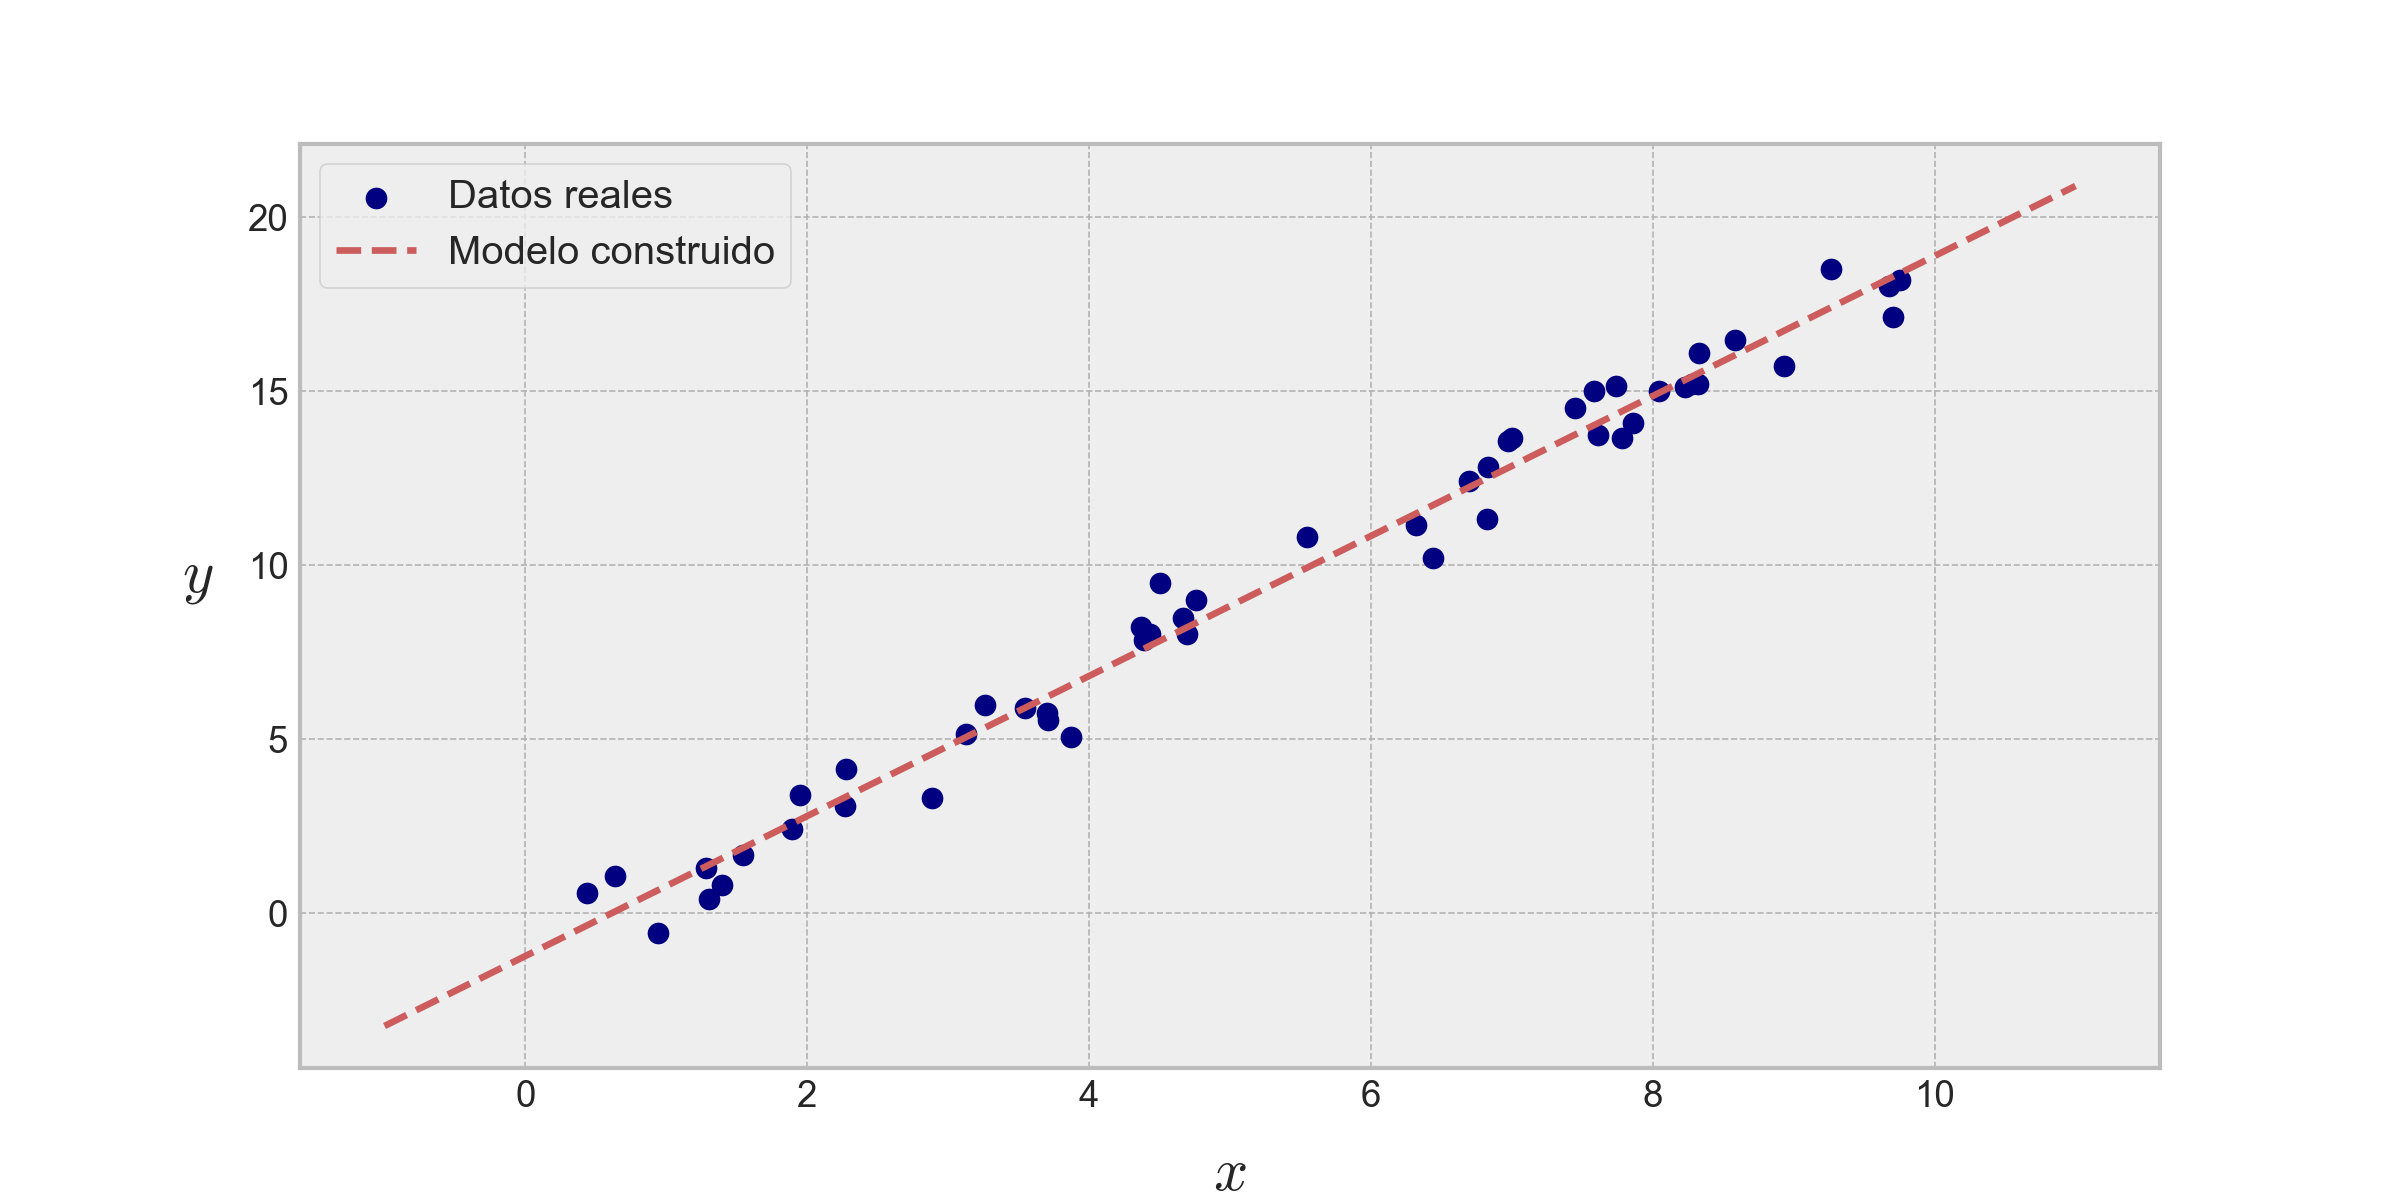

In [27]:
# Graficamos nuestros resultados.
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y, color="navy", marker="o", label="Datos reales")
ax.plot(X_new, y_new_pred, color="indianred", linestyle="--", label="Modelo construido")
ax.legend(loc="best", fontsize=12, frameon=True)
ax.set_xlabel(r"$x$", fontsize=18, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=18, labelpad=15, rotation=0);

◼︎